<a href="https://colab.research.google.com/github/imad10902/Behaviour-of-Quantum-Particles-by-ML-Algorithms-/blob/master/Machine_learning_Algorithms_on_Qunatum_Physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("hello")

hello


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [21]:
cols= ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df=pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [22]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [23]:
df['class'] = (df['class']=='g').astype(int)

In [24]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

In [25]:
list= df.columns.tolist()

In [26]:
list

['fLength',
 'fWidth',
 'fSize',
 'fConc',
 'fConc1',
 'fAsym',
 'fM3Long',
 'fM3Trans',
 'fAlpha',
 'fDist',
 'class']

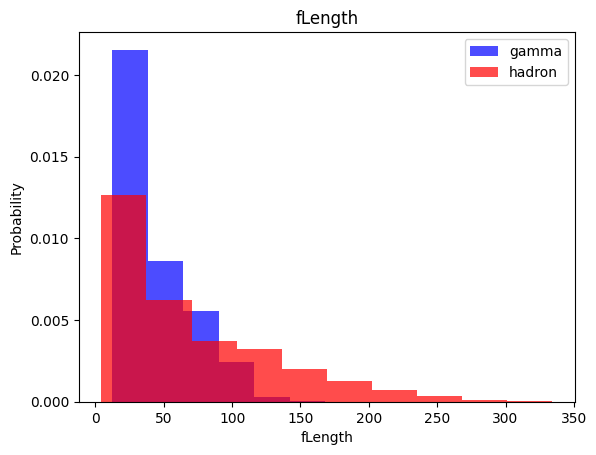

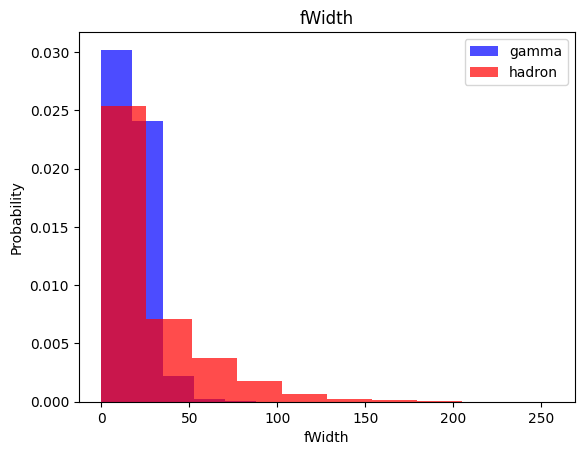

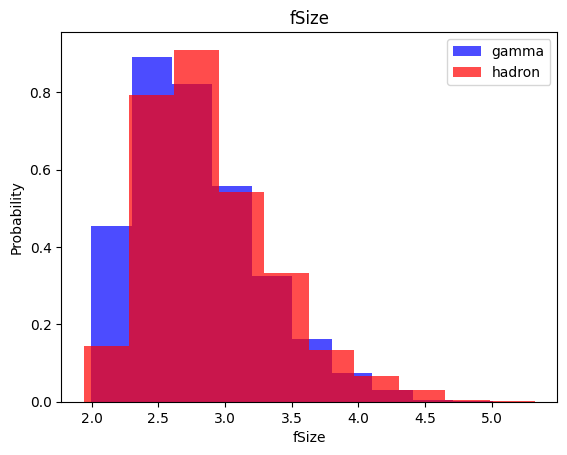

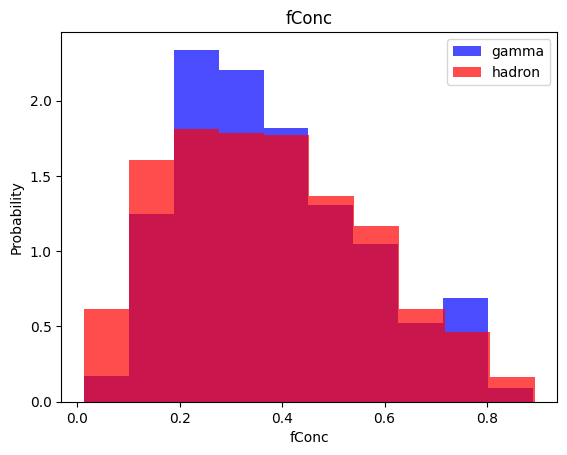

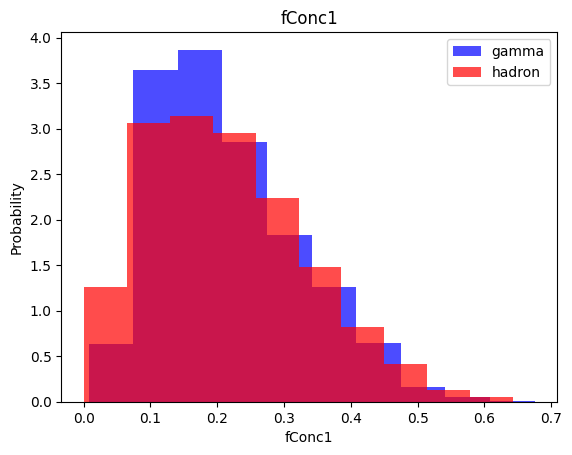

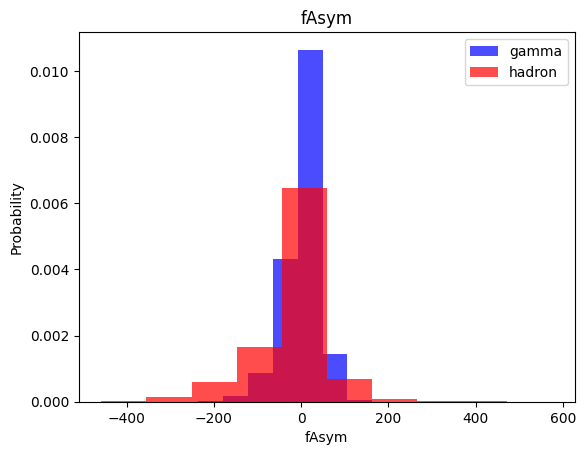

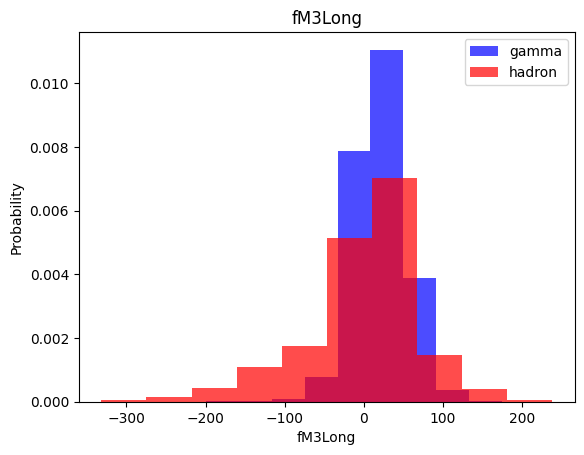

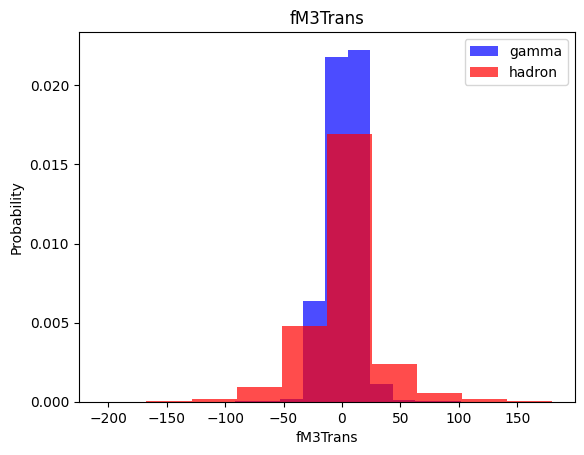

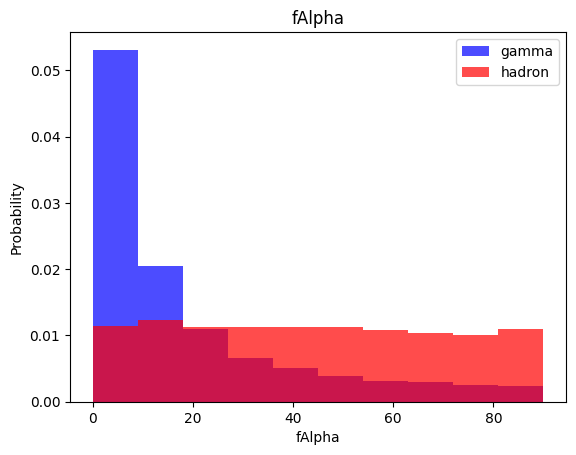

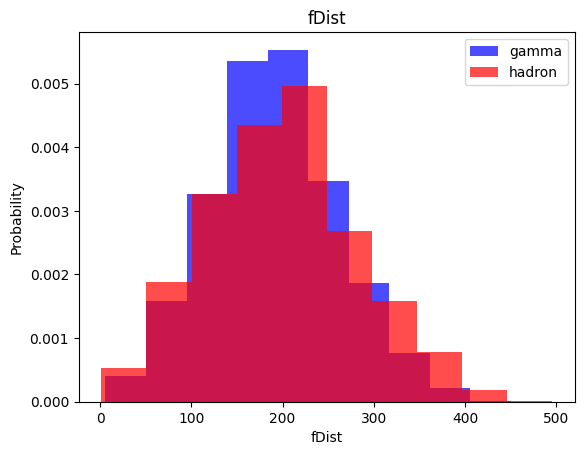

In [10]:
for label in list[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha= 0.7, density= True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha= 0.7, density= True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()
#all values in label column whose class is 1, make histogram of those column values. How much does a particular value occursdef among those selected is probability

## Splitting data to Training data, Validation data, Testing data

In [11]:
train, valid, test= np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [12]:
train

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
4457    96.4872  19.2971  2.8274  0.3185  0.1719 -149.6930   91.9232   
9282    18.8857   7.3566  2.2911  0.7928  0.4578    3.9281   -9.2363   
13703   27.5014  13.9081  2.7345  0.4588  0.2855   -5.9794   12.5412   
17815  158.4158  24.8759  2.6772  0.3309  0.1819  -98.6424 -113.2999   
1725    34.1178  12.2455  2.4005  0.5169  0.3082  -14.9147  -17.0831   
...         ...      ...     ...     ...     ...       ...       ...   
7860   116.2680  26.7356  3.4509  0.1940  0.1322  -62.5400   54.5899   
1396    27.9249   7.5792  2.2148  0.5793  0.3323   10.1629   -5.3507   
5560    20.3722  12.9030  2.2844  0.4519  0.2312  -16.5144   -5.7444   
2030    90.3339  41.3571  3.5961  0.2033  0.1114   29.7285  -43.3006   
95      25.4762  12.0898  2.4048  0.4134  0.2303    7.0323   15.7982   

       fM3Trans   fAlpha     fDist  class  
4457    13.8765  10.2130  190.5920      1  
9282     2.8273   2.7830  186.6270      1  
13703   14.0258  72.1624  150.4962      0  
17815   22.5266  54.9384  203.3284      0  
1725     8.4064   1.1540  172.4650      1  
...         ...      ...       ...    ...  
7860    24.7932   7.1670  280.2360      1  
1396    -3.2343  31.2650  165.9770      1  
5560     7.3167  50.6061  175.8560      1  
2030   -34.2388   2.8160  370.9710      1  
95       6.2085  24.8470  193.3490      1  

[11412 rows x 11 columns]

In [13]:
def scale_dataset(dataframe, oversample=False):
  x= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values



  scaler= StandardScaler()
  x= scaler.fit_transform(x)

  if oversample:
    ros= RandomOverSampler()
    x,y= ros.fit_resample(x,y)
  
  data= np.hstack((x,np.reshape(y, (-1,1))))

  return data, x ,y

#x is two dimension numpy array. 2d array is collection of arrays.
# y also has to be 2d
#The standardized data will have a mean of 0 and a standard deviation of 1 for each feature, 
#as per the standardization process.

In [14]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7418
3994


In [15]:
train, x_train, y_train = scale_dataset(train, oversample=True)

In [16]:
x_train

array([[ 1.01807577, -0.16105307,  0.00579522, ...,  0.64682711,
        -0.67048166, -0.03892087],
       [-0.81470387, -0.81249263, -1.12574493, ...,  0.1183404 ,
        -0.95581706, -0.09177282],
       [-0.61121967, -0.45506151, -0.19021462, ...,  0.65396818,
         1.70857044, -0.57338266],
       ...,
       [-0.88960785, -0.73812579, -0.58772006, ..., -0.43187084,
         0.34830783,  0.3937586 ],
       [ 0.58342489,  1.47104567,  0.88815601, ...,  0.5882015 ,
         0.49878289,  2.14425233],
       [ 2.42427711,  5.22165827,  3.1174779 , ...,  3.76058536,
         0.47669724,  1.81023071]])

In [17]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [18]:
train

array([[ 1.01807577, -0.16105307,  0.00579522, ..., -0.67048166,
        -0.03892087,  1.        ],
       [-0.81470387, -0.81249263, -1.12574493, ..., -0.95581706,
        -0.09177282,  1.        ],
       [-0.61121967, -0.45506151, -0.19021462, ...,  1.70857044,
        -0.57338266,  0.        ],
       ...,
       [-0.88960785, -0.73812579, -0.58772006, ...,  0.34830783,
         0.3937586 ,  0.        ],
       [ 0.58342489,  1.47104567,  0.88815601, ...,  0.49878289,
         2.14425233,  0.        ],
       [ 2.42427711,  5.22165827,  3.1174779 , ...,  0.47669724,
         1.81023071,  0.        ]])

In [19]:
sum(y_train==1)


7418

In [20]:
sum(y_train==0)

7418

In [27]:
valid, valid_x, valid_y= scale_dataset(valid, oversample=False)
test, test_x, test_y = scale_dataset(test, oversample=False)

# **KNN**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred= knn_model.predict(test_x)

In [31]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [32]:
test_y

array([1, 0, 0, ..., 0, 1, 1])

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1327
           1       0.86      0.87      0.87      2477

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

In [35]:
from sklearn.naive_bayes import  GaussianNB

In [36]:
nb_model= GaussianNB()

In [37]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [38]:
y_pred=nb_model.predict(test_x)

In [39]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [40]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1327
           1       0.73      0.89      0.80      2477

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [41]:
train

array([[ 1.01807577, -0.16105307,  0.00579522, ..., -0.67048166,
        -0.03892087,  1.        ],
       [-0.81470387, -0.81249263, -1.12574493, ..., -0.95581706,
        -0.09177282,  1.        ],
       [-0.61121967, -0.45506151, -0.19021462, ...,  1.70857044,
        -0.57338266,  0.        ],
       ...,
       [-0.88960785, -0.73812579, -0.58772006, ...,  0.34830783,
         0.3937586 ,  0.        ],
       [ 0.58342489,  1.47104567,  0.88815601, ...,  0.49878289,
         2.14425233,  0.        ],
       [ 2.42427711,  5.22165827,  3.1174779 , ...,  0.47669724,
         1.81023071,  0.        ]])

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg_model= LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred= lg_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1327
           1       0.84      0.82      0.83      2477

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



# Support Vector Machines

In [45]:
from sklearn.svm import SVC


In [46]:
svm_model= SVC()

In [47]:
svm_model.fit(x_train, y_train)

SVC()

In [48]:
y_pred= svm_model.predict(test_x)

In [49]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1295
           1       0.90      0.89      0.89      2509

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Netwroks

In [50]:
import tensorflow as tf

In [51]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [52]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history= nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
  
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


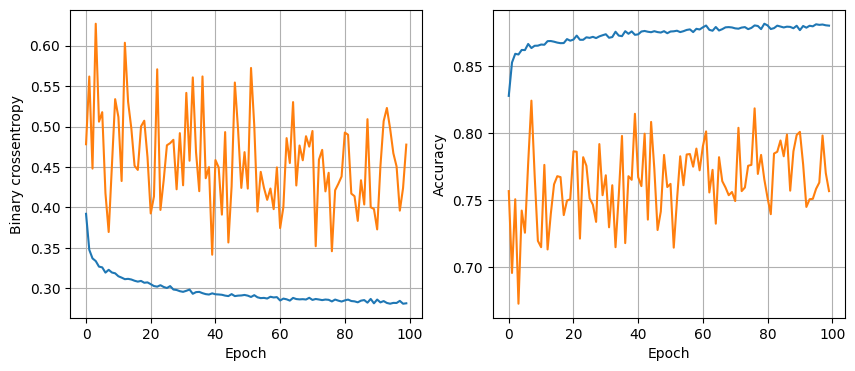

119/119 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8670
16 nodes, dropout 0, lr 0.01, batch size 64


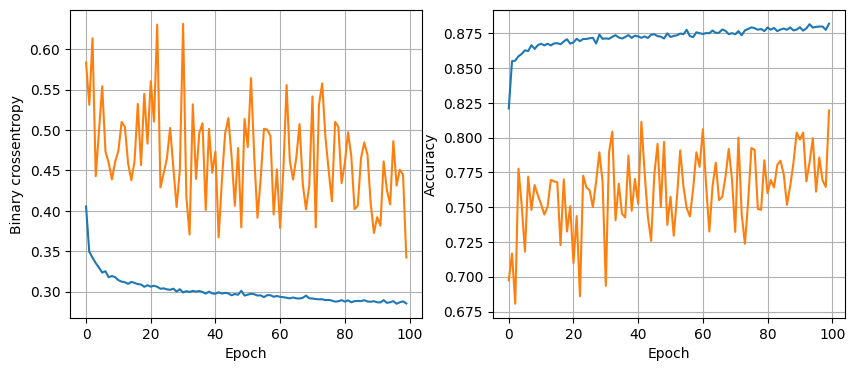

119/119 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.01, batch size 128


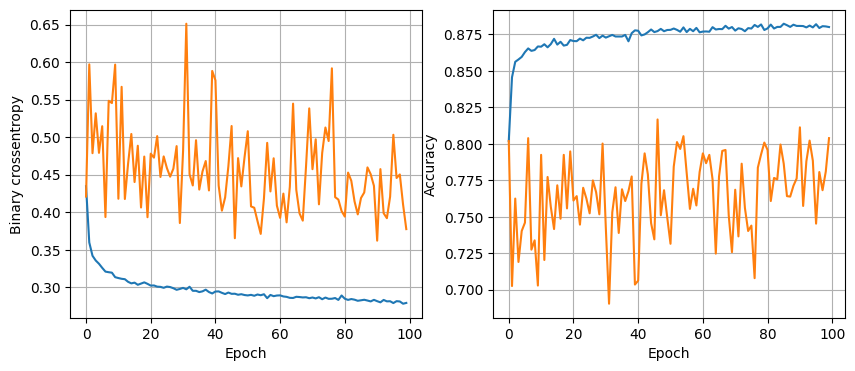

119/119 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.005, batch size 32


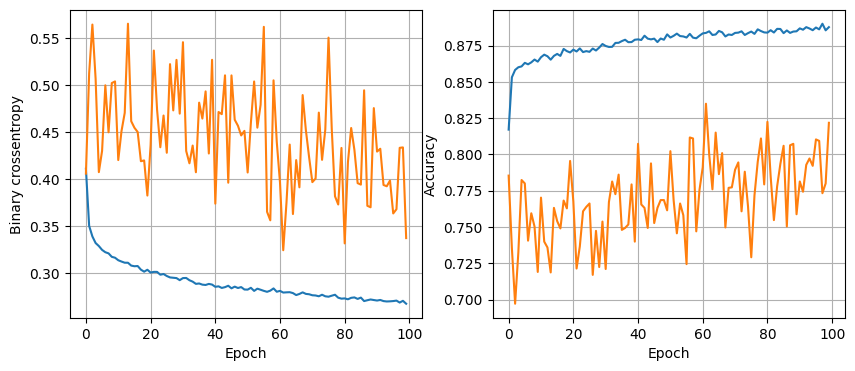

119/119 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.005, batch size 64


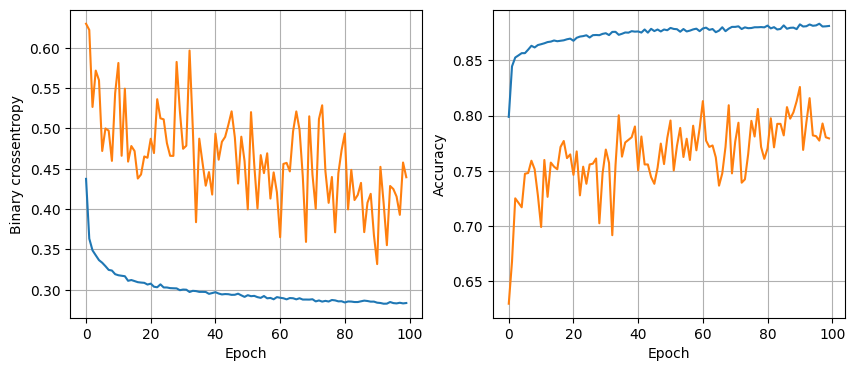

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8725
16 nodes, dropout 0, lr 0.005, batch size 128


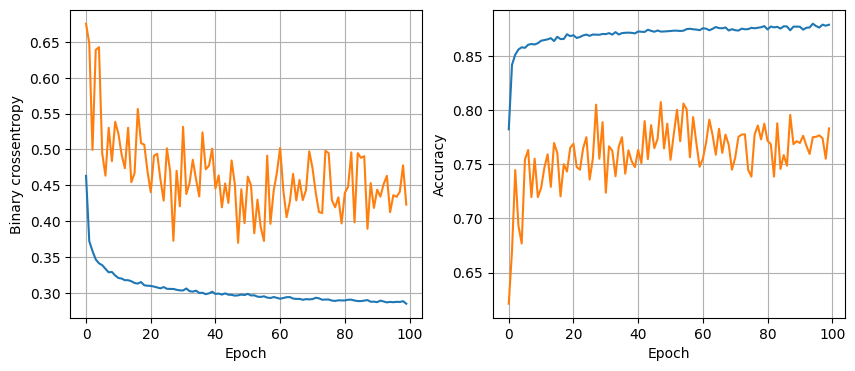

119/119 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.001, batch size 32


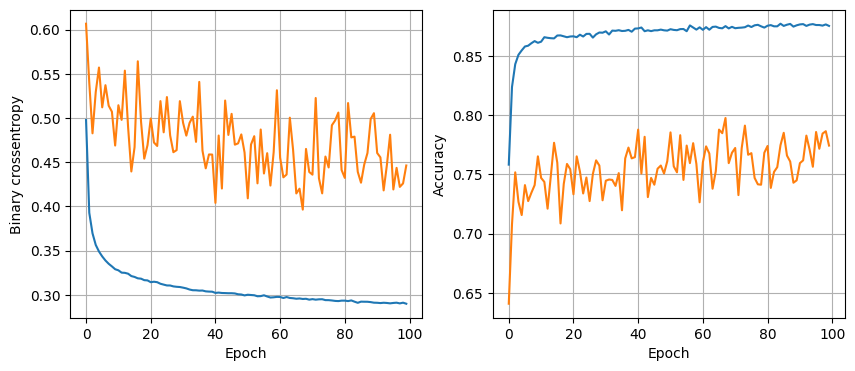

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8728
16 nodes, dropout 0, lr 0.001, batch size 64


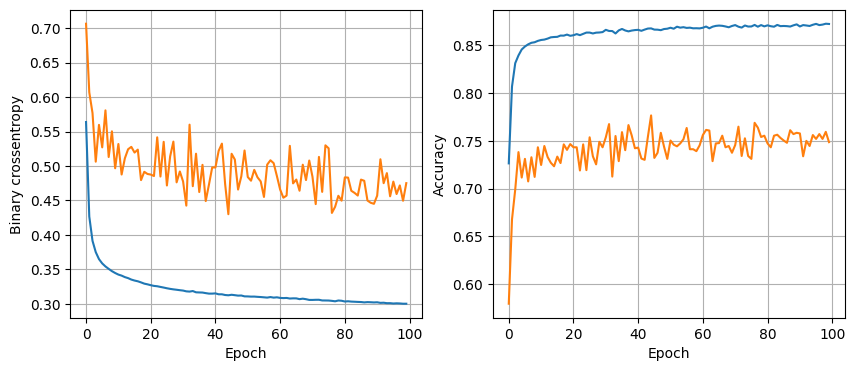

119/119 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8644
16 nodes, dropout 0, lr 0.001, batch size 128


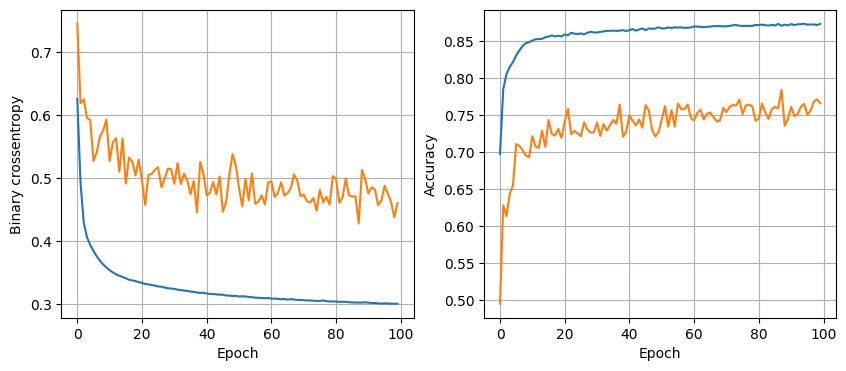

119/119 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.01, batch size 32


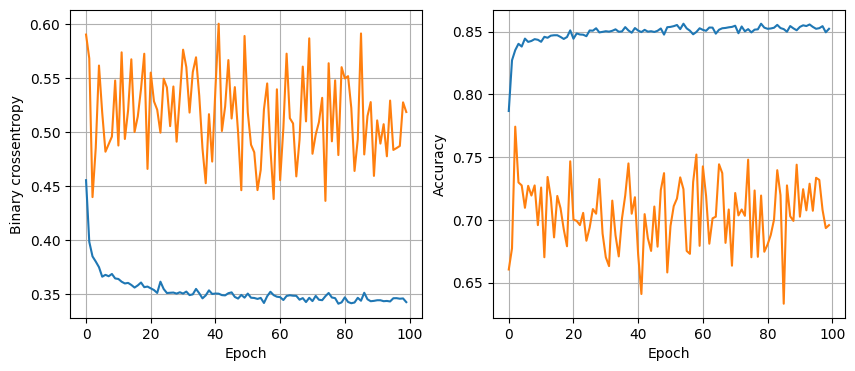

119/119 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8594
16 nodes, dropout 0.2, lr 0.01, batch size 64


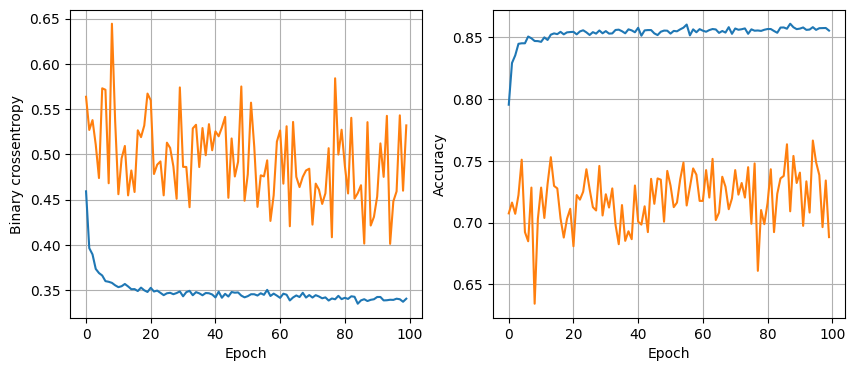

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8683
16 nodes, dropout 0.2, lr 0.01, batch size 128


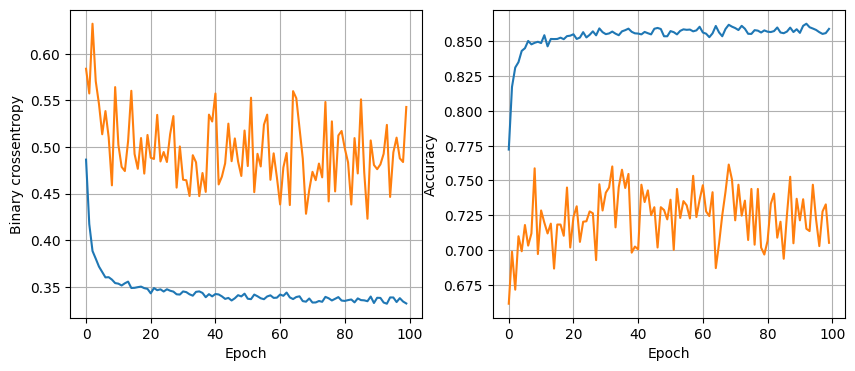

119/119 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.005, batch size 32


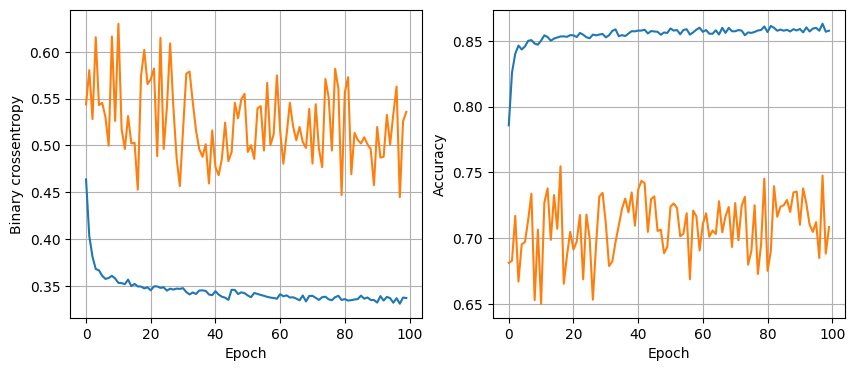

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8633
16 nodes, dropout 0.2, lr 0.005, batch size 64


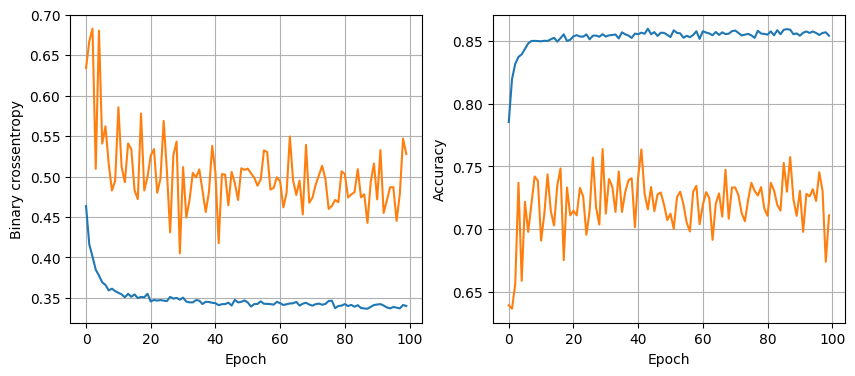

119/119 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.005, batch size 128


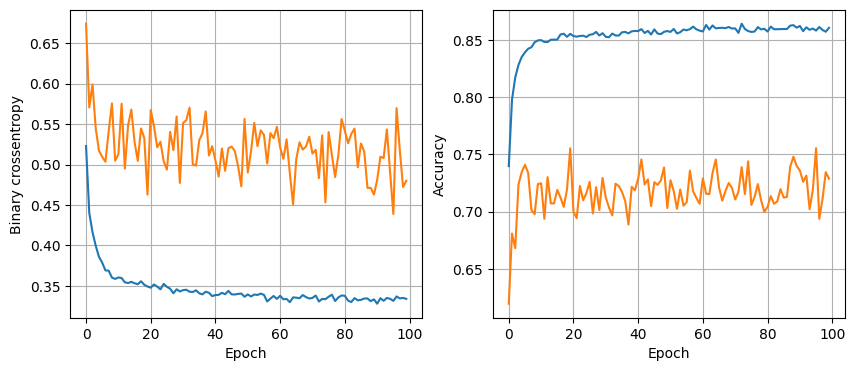

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.001, batch size 32


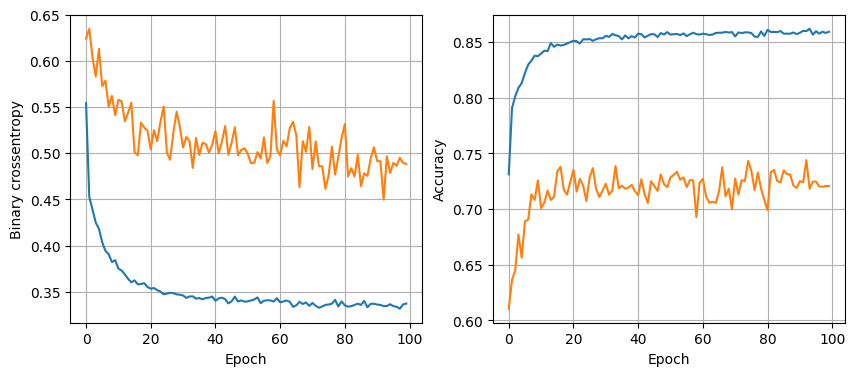

119/119 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.001, batch size 64


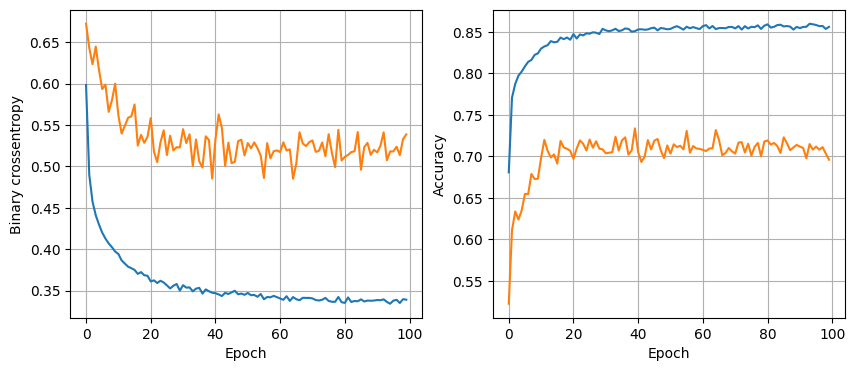

119/119 [==============================] - 0s 2ms/step - loss: 0.3206 - accuracy: 0.8688
16 nodes, dropout 0.2, lr 0.001, batch size 128


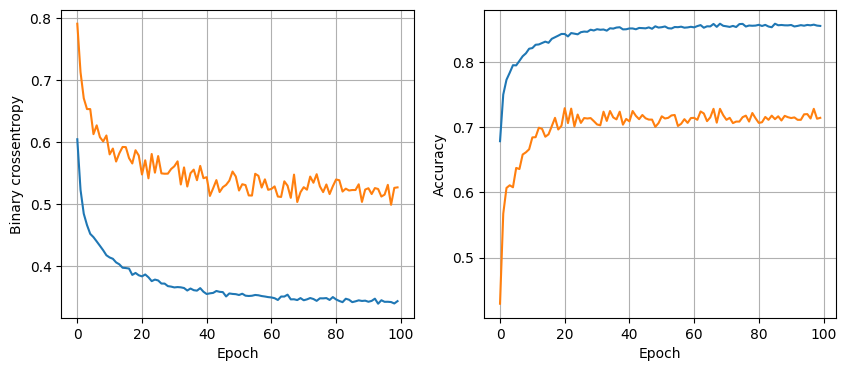

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8625
32 nodes, dropout 0, lr 0.01, batch size 32


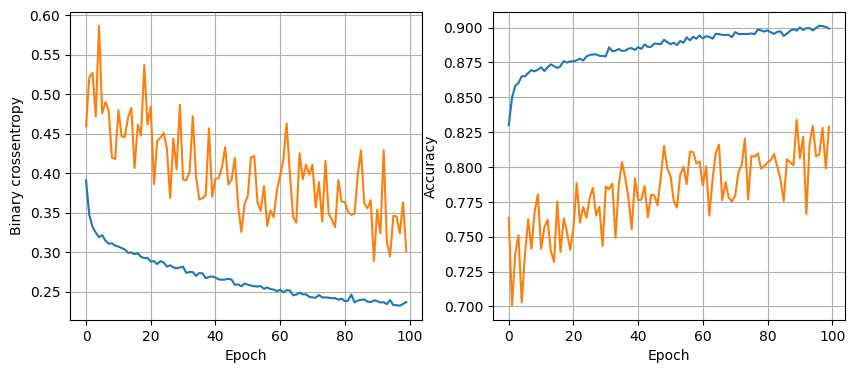

119/119 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.01, batch size 64


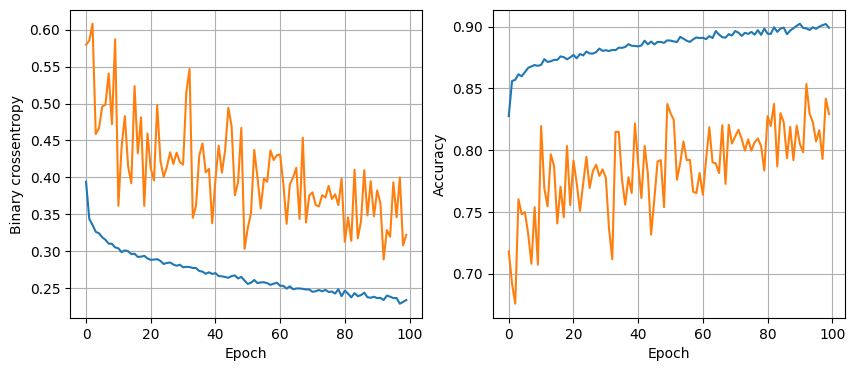

119/119 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.01, batch size 128


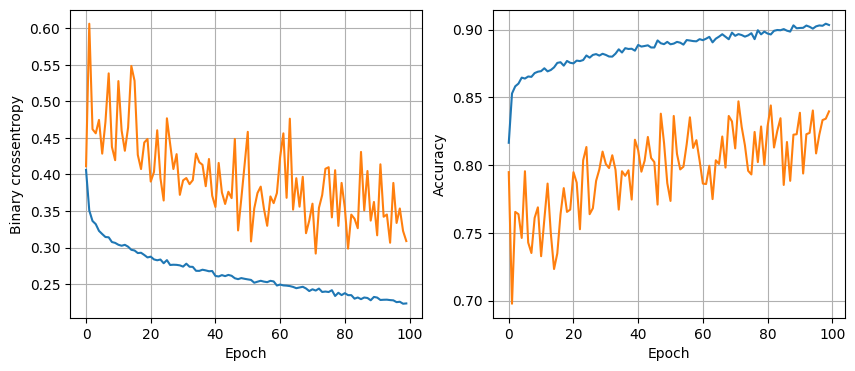

119/119 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8594
32 nodes, dropout 0, lr 0.005, batch size 32


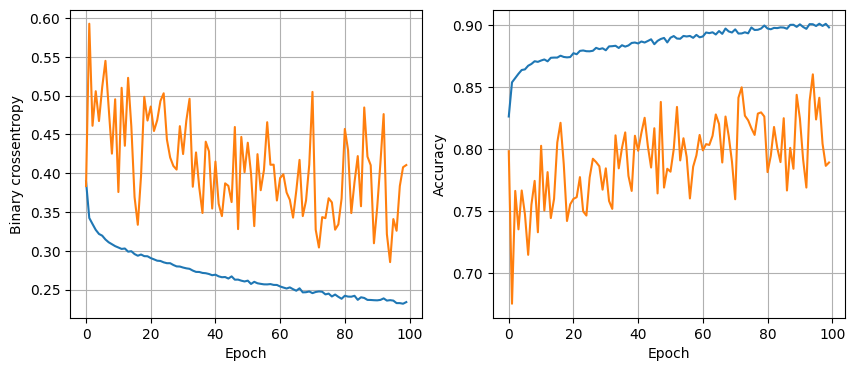

119/119 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8649
32 nodes, dropout 0, lr 0.005, batch size 64


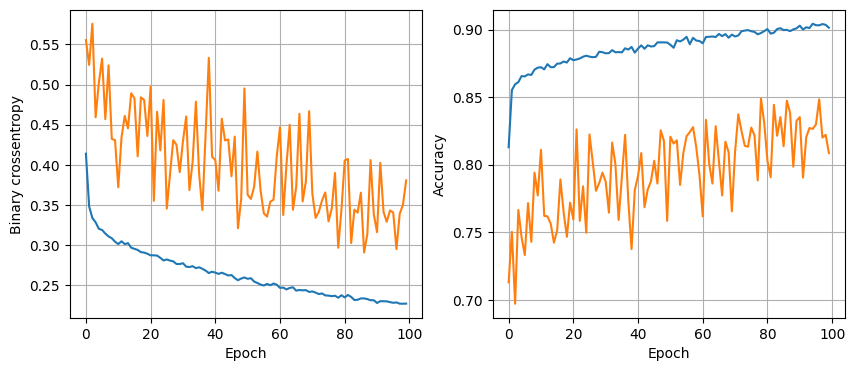

119/119 [==============================] - 0s 2ms/step - loss: 0.3816 - accuracy: 0.8670
32 nodes, dropout 0, lr 0.005, batch size 128


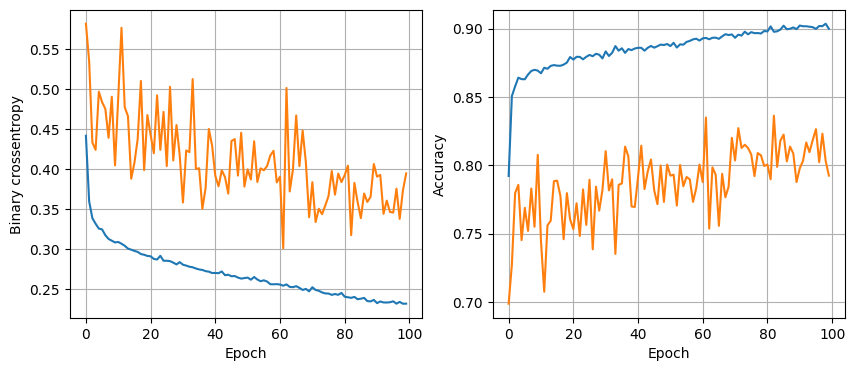

119/119 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.001, batch size 32


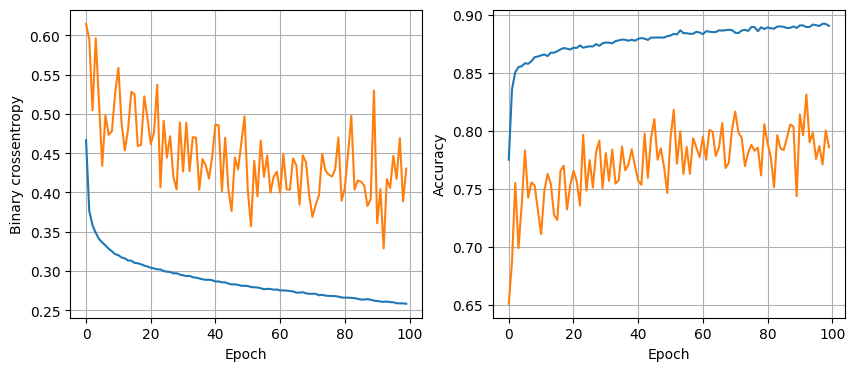

119/119 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8754
32 nodes, dropout 0, lr 0.001, batch size 64


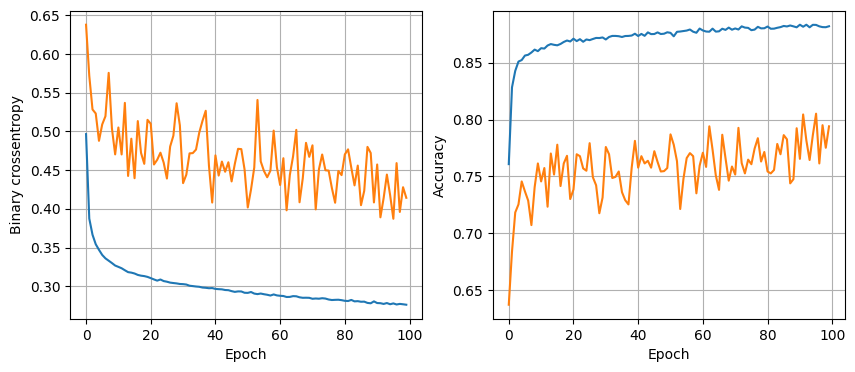

119/119 [==============================] - 0s 2ms/step - loss: 0.3207 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.001, batch size 128


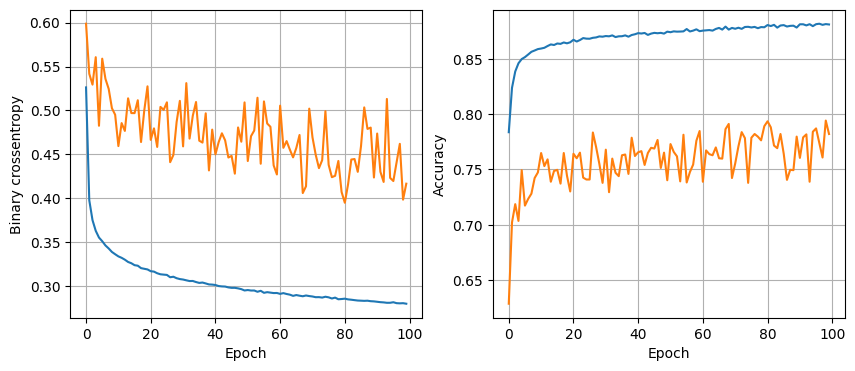

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 32


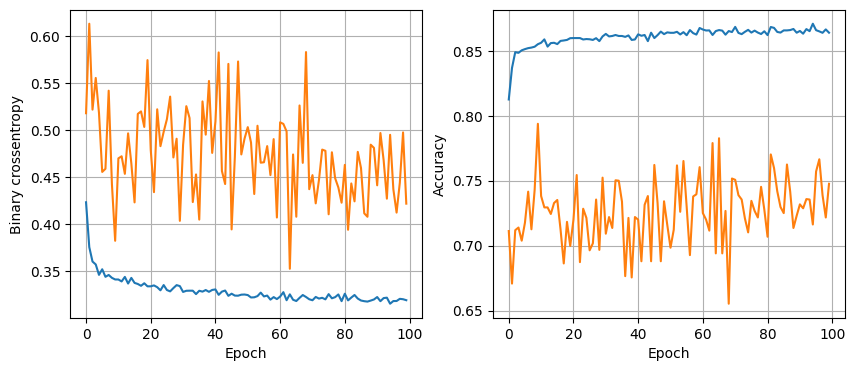

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8730
32 nodes, dropout 0.2, lr 0.01, batch size 64


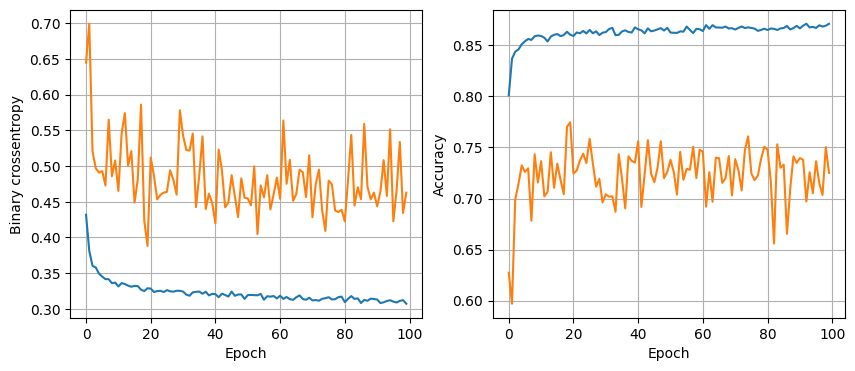

119/119 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8754
32 nodes, dropout 0.2, lr 0.01, batch size 128


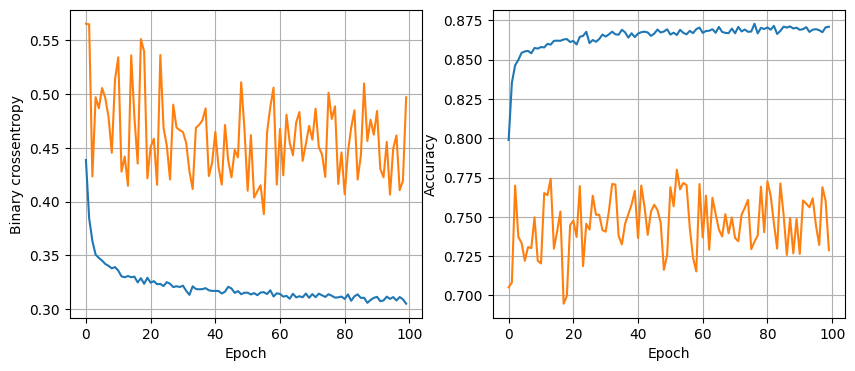

119/119 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8678
32 nodes, dropout 0.2, lr 0.005, batch size 32


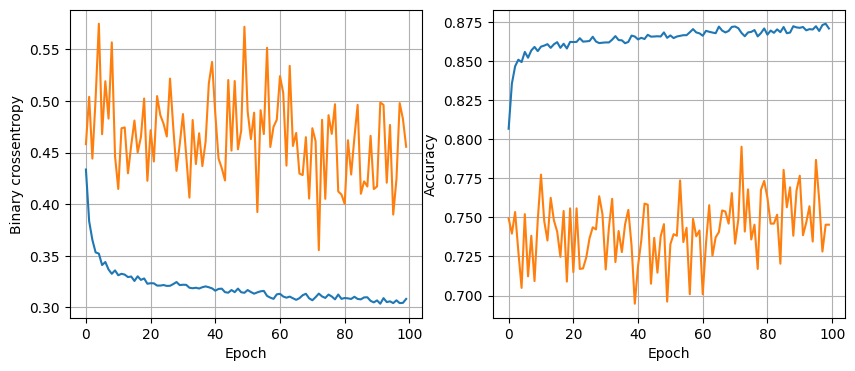

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8799
32 nodes, dropout 0.2, lr 0.005, batch size 64


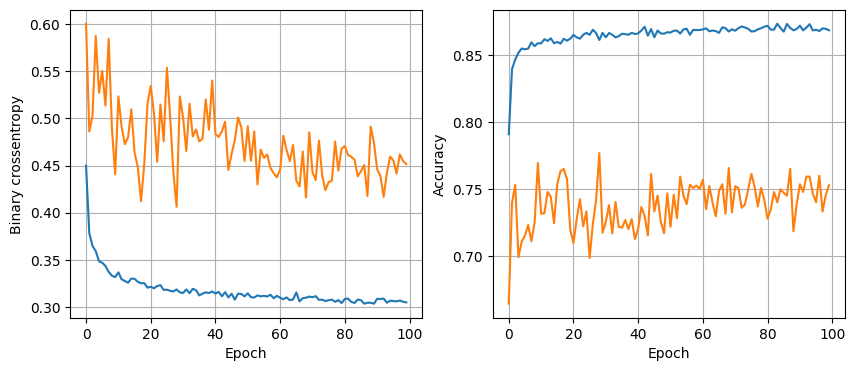

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.005, batch size 128


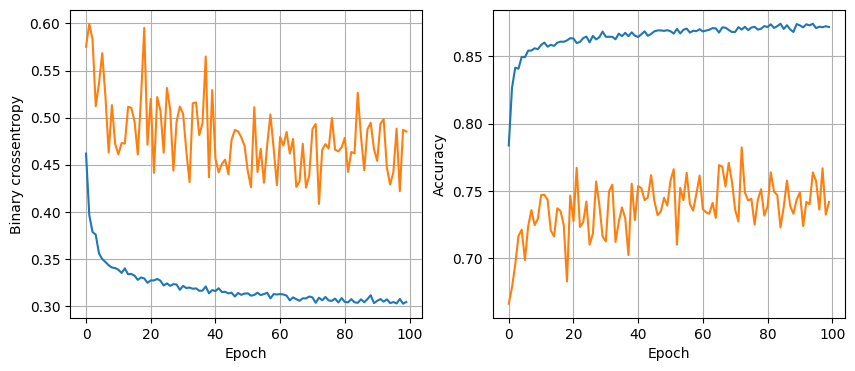

119/119 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.001, batch size 32


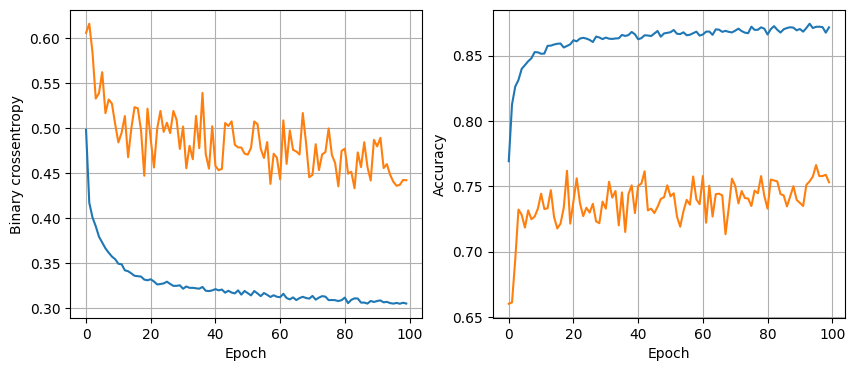

119/119 [==============================] - 0s 2ms/step - loss: 0.3059 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.001, batch size 64


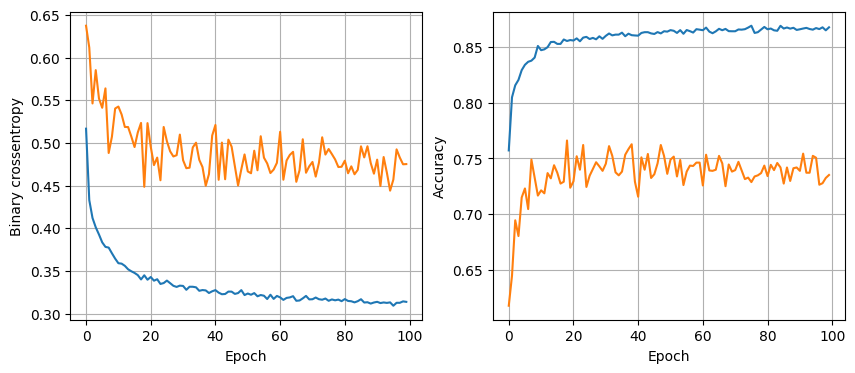

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.001, batch size 128


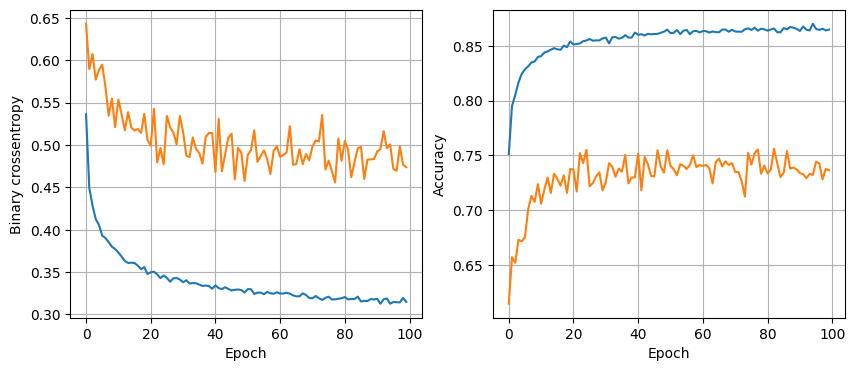

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8686
64 nodes, dropout 0, lr 0.01, batch size 32


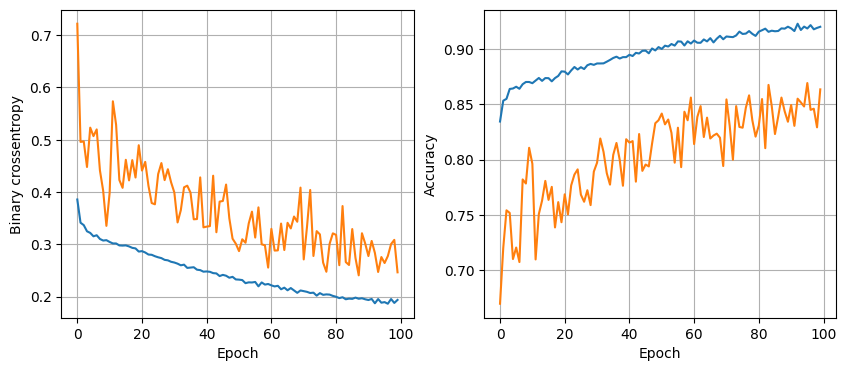

119/119 [==============================] - 0s 3ms/step - loss: 0.5908 - accuracy: 0.8588
64 nodes, dropout 0, lr 0.01, batch size 64


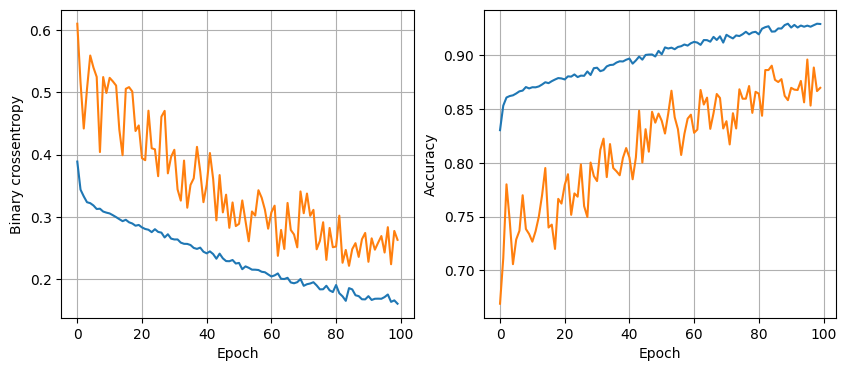

119/119 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.8596
64 nodes, dropout 0, lr 0.01, batch size 128


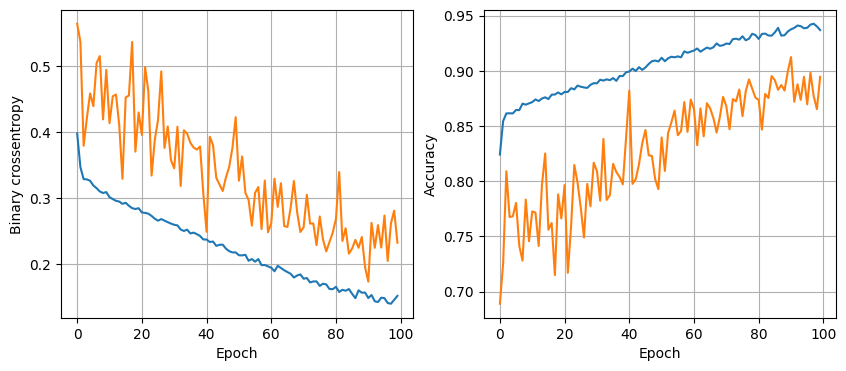

119/119 [==============================] - 0s 2ms/step - loss: 0.6470 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch size 32


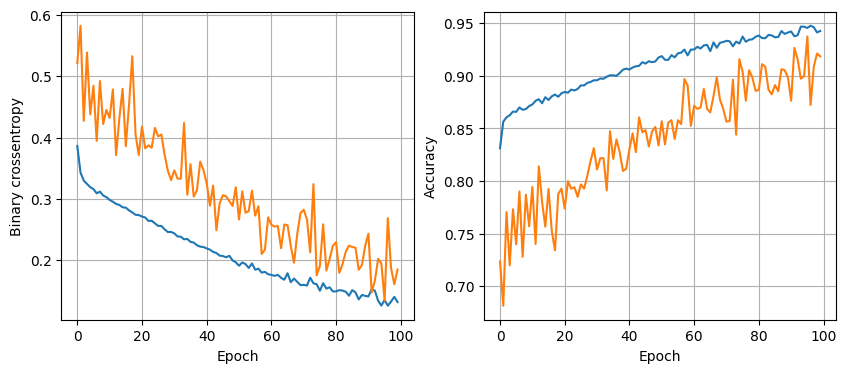

119/119 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.8520
64 nodes, dropout 0, lr 0.005, batch size 64


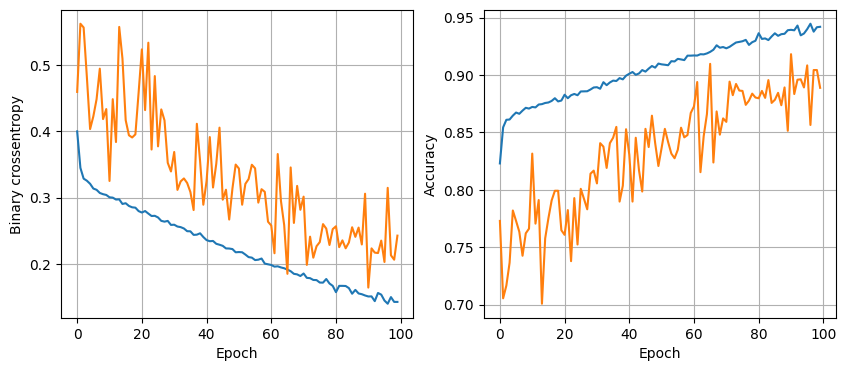

119/119 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.8672
64 nodes, dropout 0, lr 0.005, batch size 128


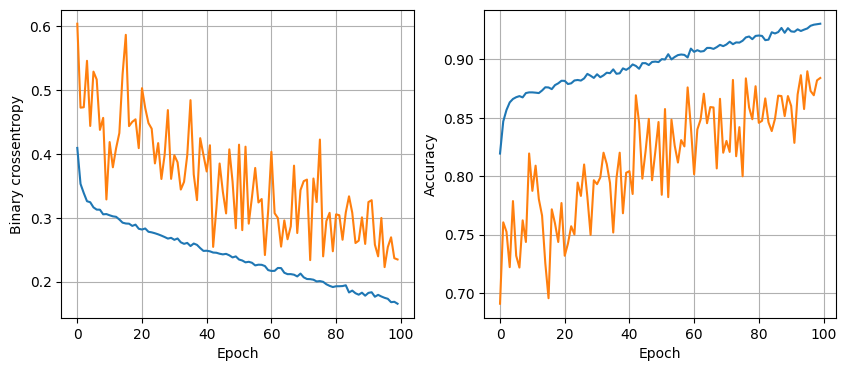

119/119 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.8562
64 nodes, dropout 0, lr 0.001, batch size 32


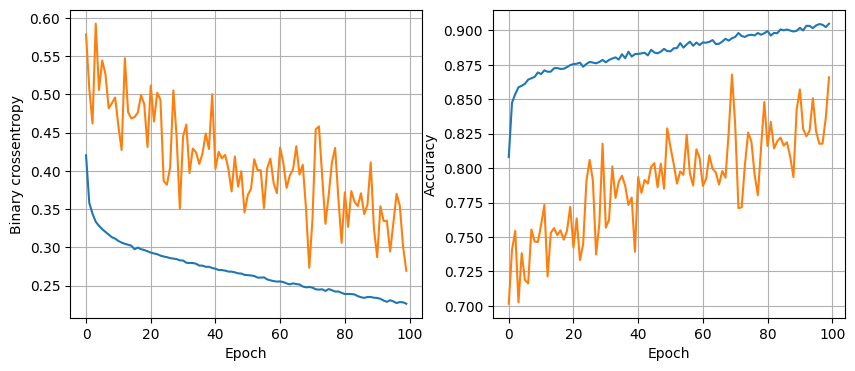

119/119 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8617
64 nodes, dropout 0, lr 0.001, batch size 64


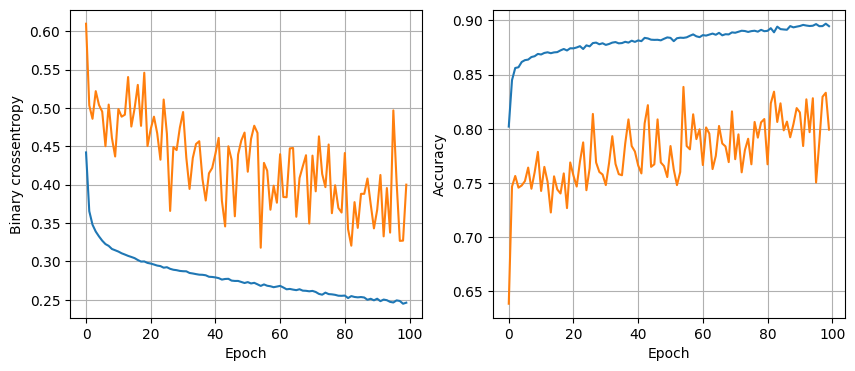

119/119 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.001, batch size 128


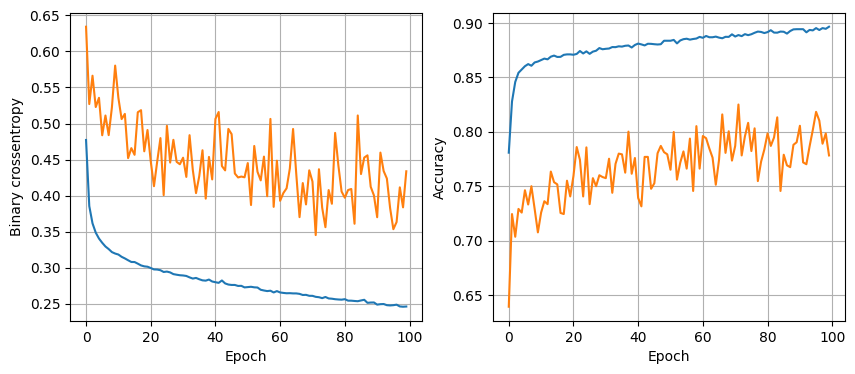

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.01, batch size 32


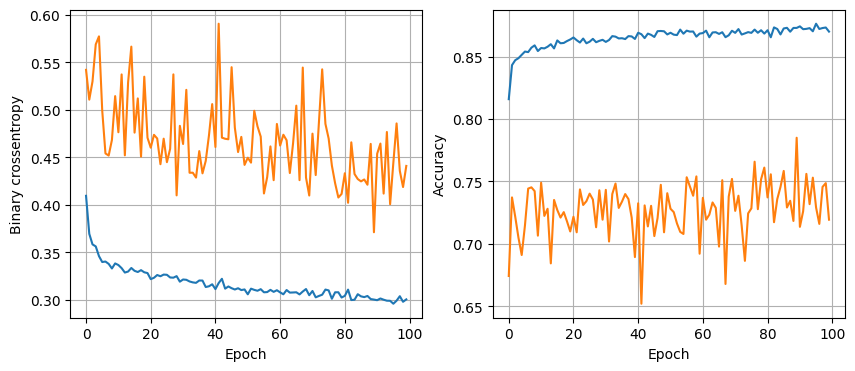

119/119 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8704
64 nodes, dropout 0.2, lr 0.01, batch size 64


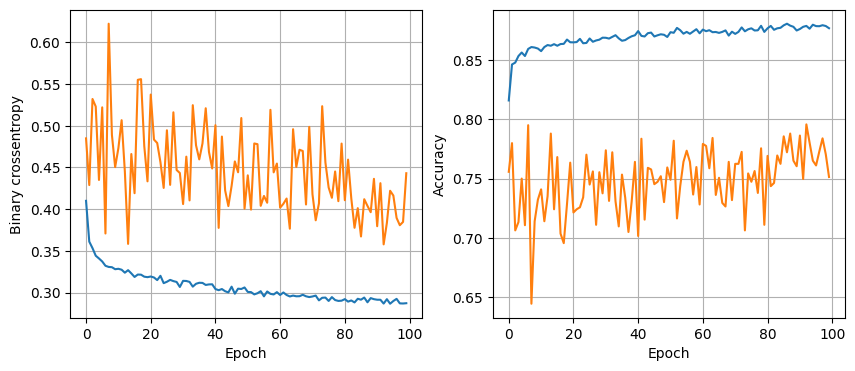

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.01, batch size 128


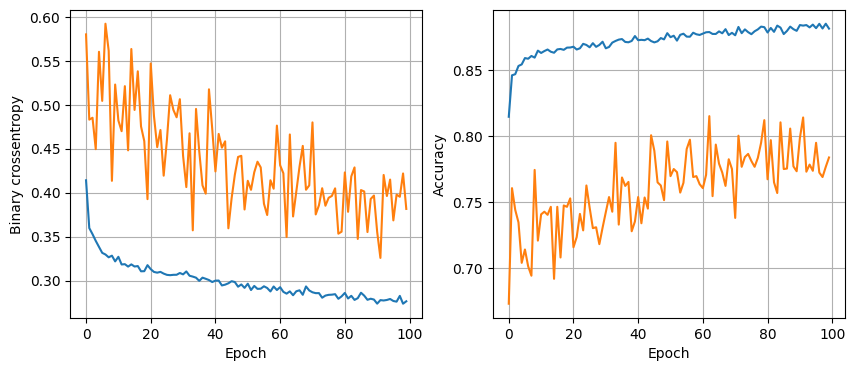

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.005, batch size 32


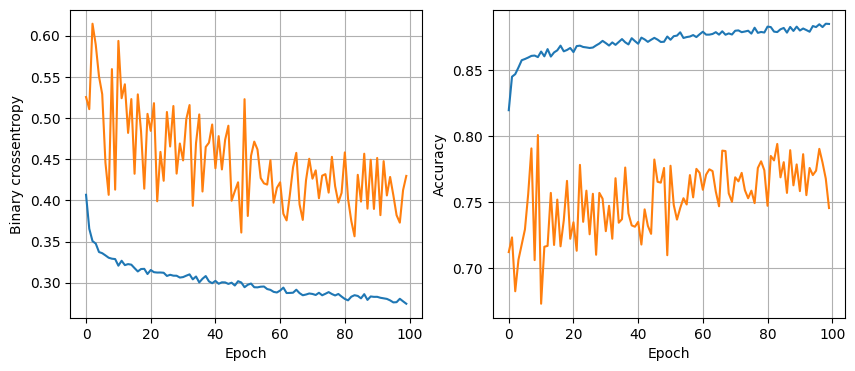

119/119 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.005, batch size 64


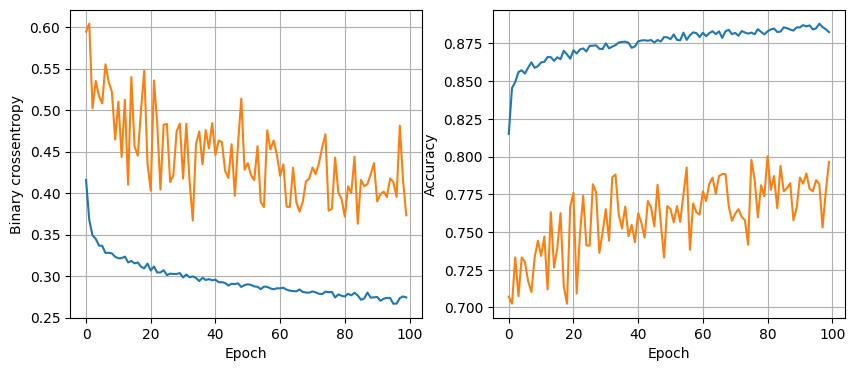

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8801
64 nodes, dropout 0.2, lr 0.005, batch size 128


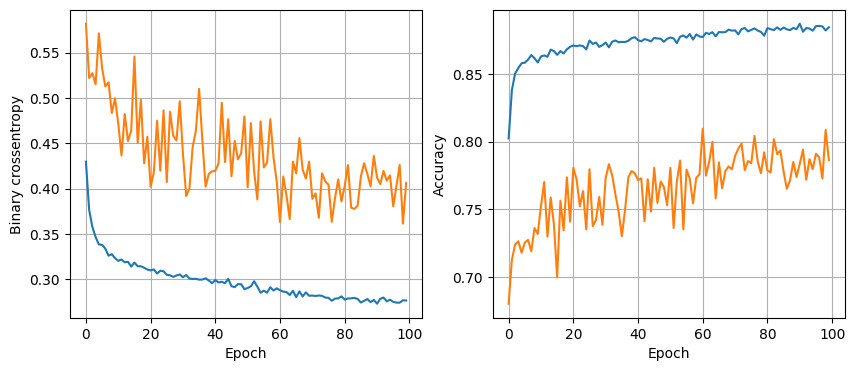

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 32


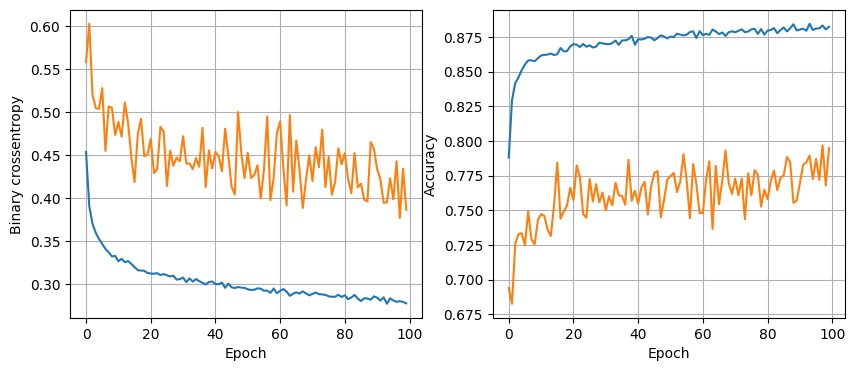

119/119 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.001, batch size 64


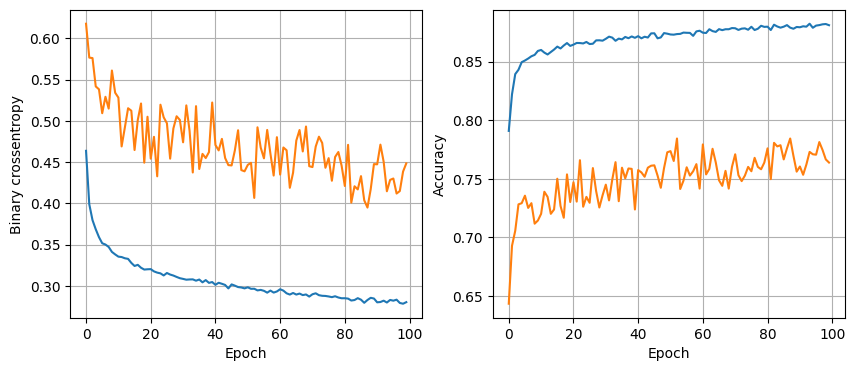

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 128


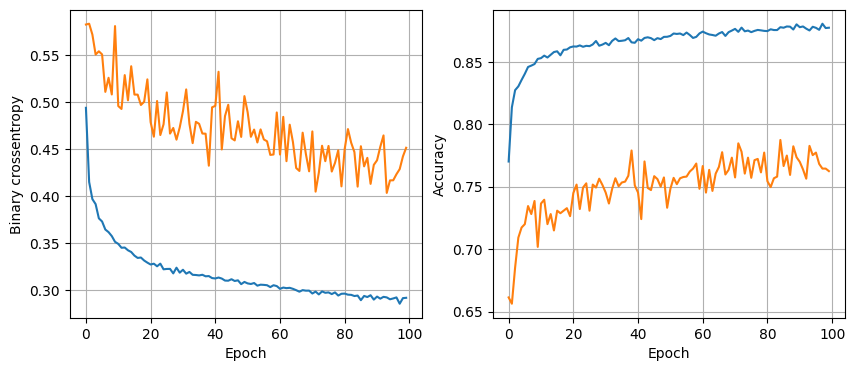

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8709


In [53]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(valid_x, valid_y)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [56]:
Y_pred = least_loss_model.predict(test_x)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(test_y, Y_pred))

119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1327
           1       0.88      0.95      0.91      2477

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

